# Bikeshare System

Create a bikeshare system that models three locations. Assuming the locations are called A, B, and C, use the following parameters:

- total number of bikes = 100
- p_AB = 0.3
- p_BA = 0.2
- p_AC = 0.4
- p_CA = 0.1
- p_BC = 0.35
- p_CB = 0.15

Try to determine the optimal initial configuration of the 100 bikes between the three locations such that the number of unsatisfied customers will be minimized over a three-hour period of bike sharing.

### Results

I ran the simulation with the suggested initial bike values (A=10, B=30, C=60, and A=10, B=60, C=30) and noticed that location A kept running out of bikes, location C usually ended with the majority of the bikes, and there was an average of about 30 total unsatisfied customers. And so, I adjusted the initial starting values so that location A started with the most bikes, and location C with the least: A=60, B=30, C=10.

This resulted in an average total of unsatisfied customers which was close to zero (~0.01). I then began to adjust the initial number of bikes at location A in intervals of 10, then 1, leaving the initial number of bikes at location C constant. I found that I had the least number of unsatisfied customers when the initial number of bikes at A was between 59 and 63. I then set to fine-tuning the initial number of bikes at location C by cycling through values between 2 and 13, while the initial number of bikes at A remained constant at 60. I found that starting with 5 or 6 bikes at location C resulted in no unsatisfied customers.

I did a couple more tests to try and find the best parameter values by cycling through different initial values for A when the initial C value was 6, and then when the initial C value was 5. From this, I concluded that the optimal initial configuration of the 100 bikes would be: A = 63, B = 32, and C = 5. 

In [10]:
# import functions from modsim
from modsim import * 

In [11]:
def step(state, p_AB, p_BA, p_AC, p_CA, p_BC, p_CB):
    """
    Simulate one time step.
    
    :param state: bikeshare State object
    :param p_AB: probability of an A to B ride
    :param p_BA: probability of a B to A ride
    :param p_AC: probability of an A to C ride
    :param p_CA: probability of a C to A ride
    :param p_BC: probability of a B to C ride
    :param p_CB: probability of a C to B ride
    """
    
    if flip(p_AB):
        bike_AB(state)
    if flip(p_BA):
        bike_BA(state)
    
    if flip(p_AC):
        bike_AC(state)
    if flip(p_CA):
        bike_CA(state)
    
    if flip(p_BC):
        bike_BC(state)
    if flip(p_CB):
        bike_CB(state)

def bike_AB(state):
    """Move one bike from A to B.
    
    state: bikeshare State object
    """
    if state.A == 0:
        state.A_empty += 1
        return
    state.A -= 1
    state.B += 1
    
def bike_BA(state):
    """Move one bike from B to A.
    
    state: bikeshare State object
    """
    if state.B == 0:
        state.B_empty += 1
        return
    state.B -= 1
    state.A += 1

def bike_AC(state):
    """Move one bike from A to C.
    
    state: bikeshare State object
    """
    if state.A == 0:
        state.A_empty += 1
        return
    state.A -= 1
    state.C += 1
    
def bike_CA(state):
    """Move one bike from C to A.
    
    state: bikeshare State object
    """
    if state.C == 0:
        state.C_empty += 1
        return
    state.C -= 1
    state.A += 1

def bike_BC(state):
    """Move one bike from B to C.
    
    state: bikeshare State object
    """
    if state.B == 0:
        state.B_empty += 1
        return
    state.B -= 1
    state.C += 1
    
def bike_CB(state):
    """Move one bike from C to B.
    
    state: bikeshare State object
    """
    if state.C == 0:
        state.C_empty += 1
        return
    state.C -= 1
    state.B += 1

In [12]:
def run_simulation(state, p_AB, p_BA, p_AC, p_CA, p_BC, p_CB, num_steps, do_plot=True):
    """Simulate the given number of time steps.
    
    :param state: State object
    :param p_AB: probability of an A to B ride
    :param p_BA: probability of a B to A ride
    :param p_AC: probability of an A to C ride
    :param p_CA: probability of a C to A ride
    :param p_BC: probability of a B to C ride
    :param p_CB: probability of a C to B ride
    :param num_steps: number of time steps
    """
    results_A = TimeSeries()
    results_A[0] = state.A
    
    results_B = TimeSeries()
    results_B[0] = state.B
    
    results_C = TimeSeries()
    results_C[0] = state.C
    
    results_A_unsatisfied = TimeSeries()
    results_A_unsatisfied[0] = state.A_empty
    
    results_B_unsatisfied = TimeSeries()
    results_B_unsatisfied[0] = state.B_empty
    
    results_C_unsatisfied = TimeSeries()
    results_C_unsatisfied[0] = state.C_empty
    
    for i in range(num_steps):
        step(state, p_AB, p_BA, p_AC, p_CA, p_BC, p_CB)
        results_A[i+1] = state.A
        results_B[i+1] = state.B
        results_C[i+1] = state.C
        results_A_unsatisfied[i+1] = state.A_empty
        results_B_unsatisfied[i+1] = state.B_empty
        results_C_unsatisfied[i+1] = state.C_empty
        
    if (do_plot):
        fig, ax = plt.subplots(1,2,figsize=(12,6))
        ax[0].plot(results_A, label='A')
        ax[0].plot(results_B, label='B')
        ax[0].plot(results_C, label='C')
        ax[0].set_xlabel('Time step (min)')
        ax[0].set_ylabel('Number of bikes')
        ax[0].legend()
        ax[1].plot(results_A_unsatisfied, label='A')
        ax[1].plot(results_B_unsatisfied, label='B')
        ax[1].plot(results_C_unsatisfied, label='C')
        ax[1].set_xlabel('Time step (min)')
        ax[1].set_ylabel('Number of unsatisfied customers')
        ax[1].legend()
        plt.show()
    
    return results_A_unsatisfied[num_steps-1] + results_B_unsatisfied[num_steps-1] + results_C_unsatisfied[num_steps-1]

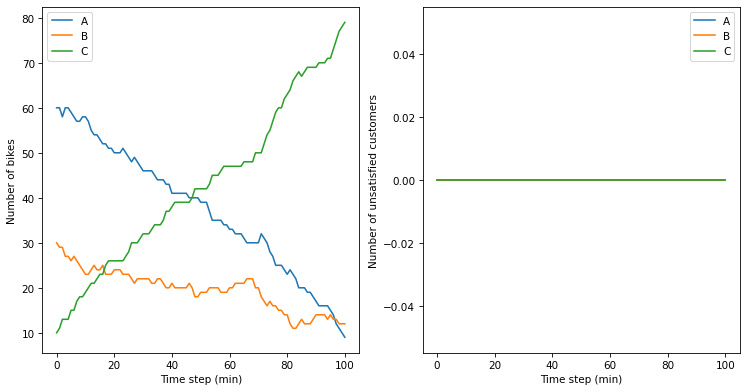

Average Number of Unsatisfied Customers:  0.01


In [21]:
# probabilities for biking from one place to another
p_AB = 0.3
p_BA = 0.2
p_AC = 0.4
p_CA = 0.1
p_BC = 0.35
p_CB = 0.15

# initial number of bikes at each place
# A_start = 10
# B_start = 30
# C_start = 60

# A_start = 10
# B_start = 60
# C_start = 30

A_start = 60
B_start = 30
C_start = 10

# number of simulations
num_sims = 100

total_unsatisfied_sum = 0
for i in range(num_sims):
    bikeshare = State(A=A_start, B=B_start, C=C_start,
                      A_empty=0, B_empty=0, C_empty=0)
    do_plot = False
    if i == (num_sims - 1):
        do_plot = True
    total_unsatisfied = run_simulation(bikeshare, p_AB, p_BA, p_AC,
                                       p_CA, p_BC, p_CB, num_steps=100, do_plot=do_plot)
    total_unsatisfied_sum += total_unsatisfied

avg_total_unsatisfied = total_unsatisfied_sum / num_sims
print("Average Number of Unsatisfied Customers: ", avg_total_unsatisfied)

A_start:  30


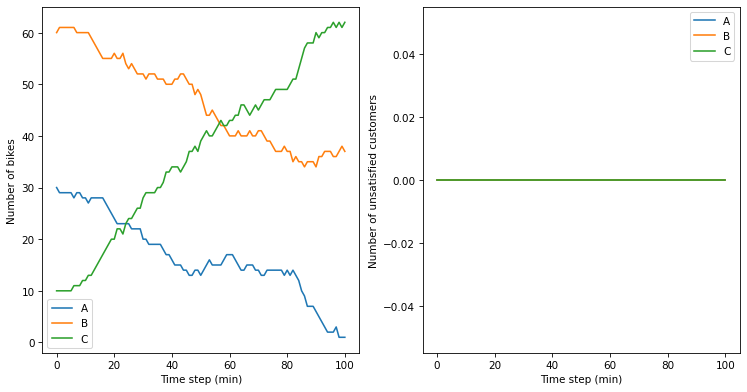

Average Number of Unsatisfied Customers:  10.63

A_start:  40


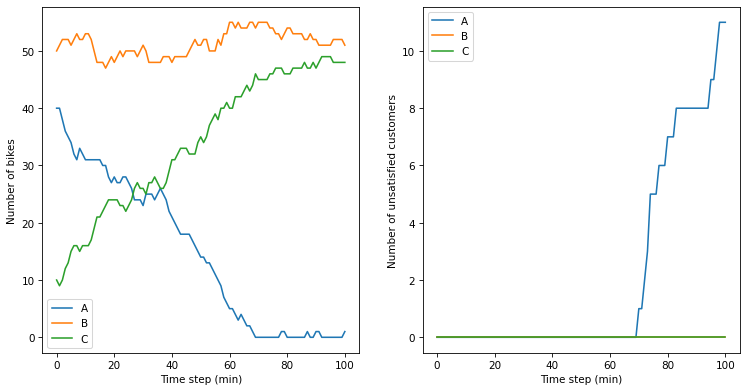

Average Number of Unsatisfied Customers:  3.615

A_start:  50


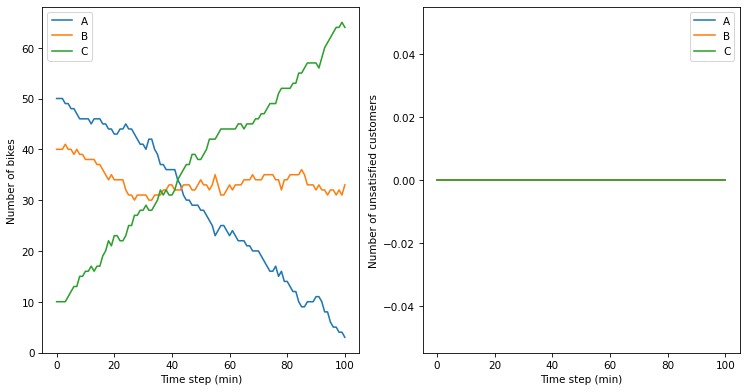

Average Number of Unsatisfied Customers:  0.655

A_start:  60


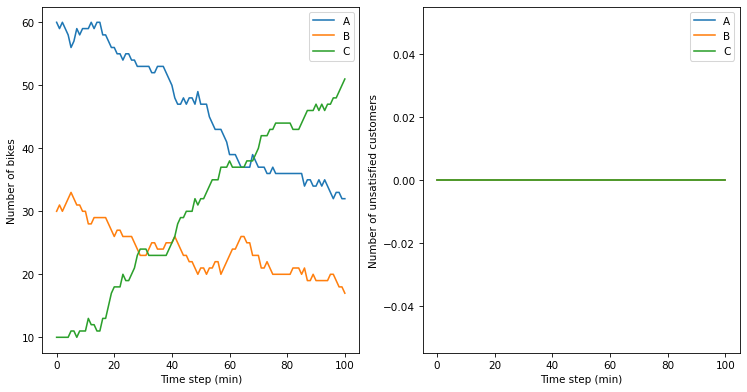

Average Number of Unsatisfied Customers:  0.08

A_start:  70


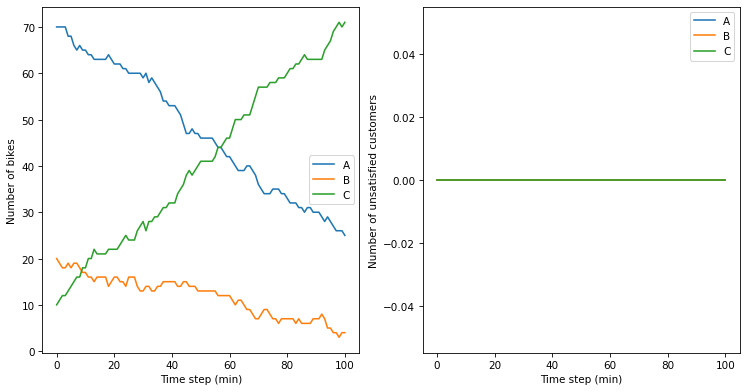

Average Number of Unsatisfied Customers:  0.525


In [23]:
# probabilities for biking from one place to another
p_AB = 0.3
p_BA = 0.2
p_AC = 0.4
p_CA = 0.1
p_BC = 0.35
p_CB = 0.15

# initial number of bikes at each place
A_start_list = [30, 40, 50, 60, 70]
C_start = 10

for A_start in A_start_list:
    print("A_start: ", A_start)
    B_start = 90 - A_start
    # number of simulations
    num_sims = 200
    total_unsatisfied_sum = 0
    for i in range(num_sims):
        bikeshare = State(A=A_start, B=B_start, C=C_start,
                          A_empty=0, B_empty=0, C_empty=0)
        do_plot = False
        if i == (num_sims - 1):
            do_plot = True
        total_unsatisfied = run_simulation(bikeshare, p_AB, p_BA, p_AC,
                                           p_CA, p_BC, p_CB, num_steps=100, do_plot=do_plot)
        total_unsatisfied_sum += total_unsatisfied
    
    avg_total_unsatisfied = total_unsatisfied_sum / num_sims
    print("Average Number of Unsatisfied Customers: ", avg_total_unsatisfied)
    print()

A_start:  56


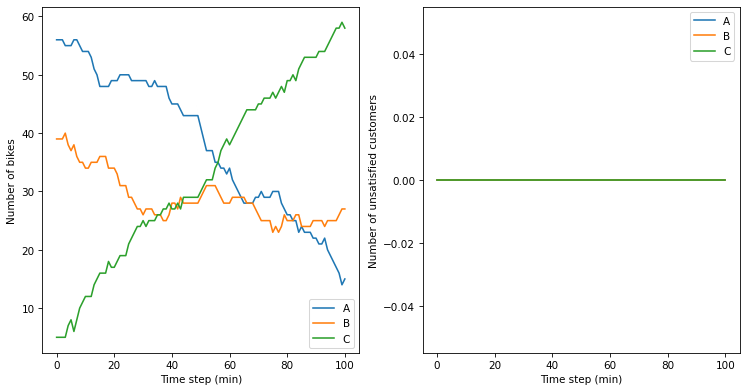

Average Number of Unsatisfied Customers:  0.095

A_start:  57


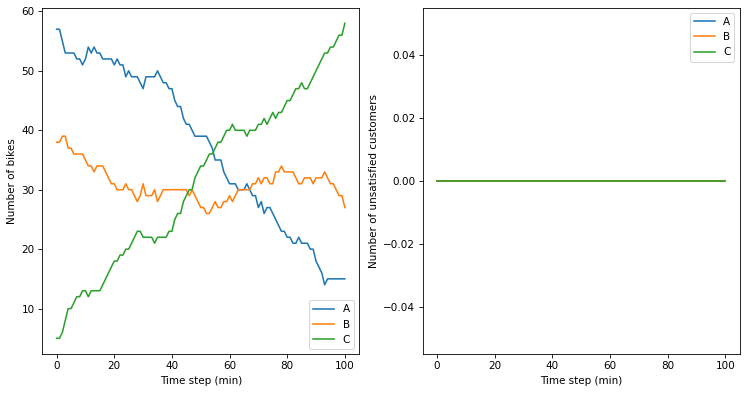

Average Number of Unsatisfied Customers:  0.02

A_start:  58


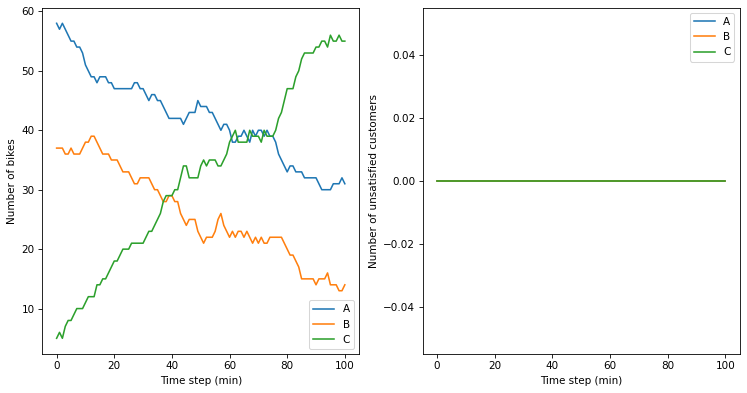

Average Number of Unsatisfied Customers:  0.09

A_start:  59


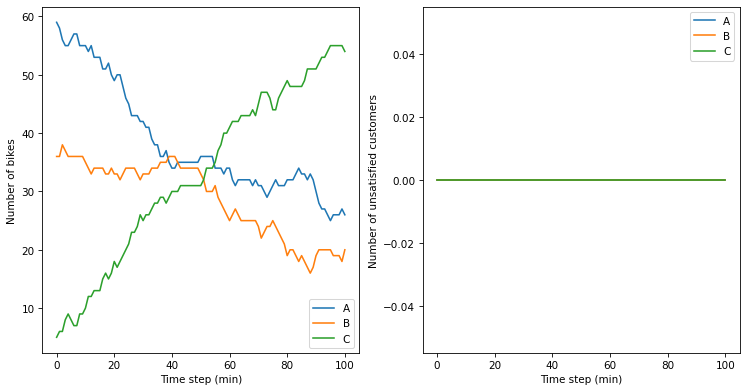

Average Number of Unsatisfied Customers:  0.1

A_start:  60


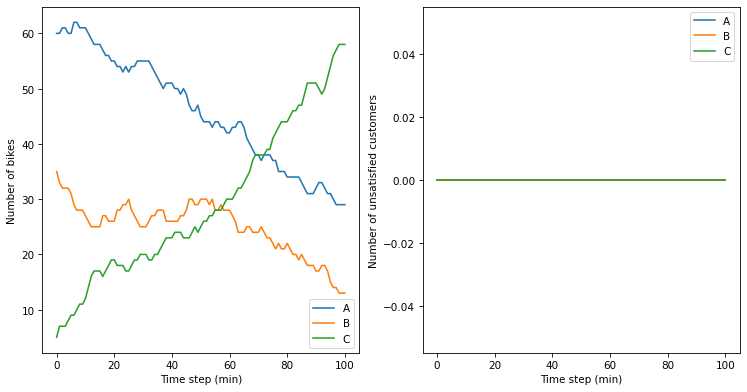

Average Number of Unsatisfied Customers:  0.03

A_start:  61


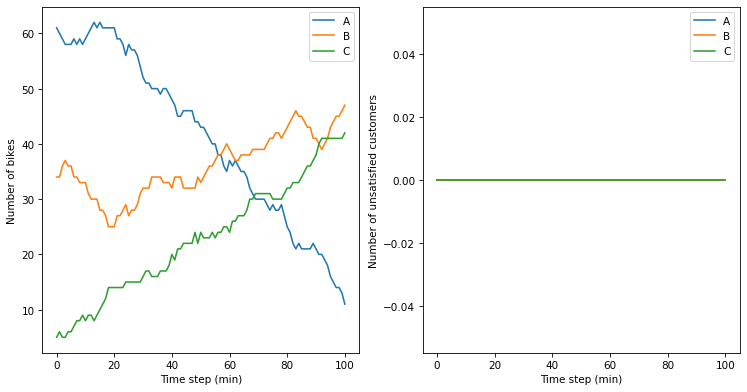

Average Number of Unsatisfied Customers:  0.01

A_start:  62


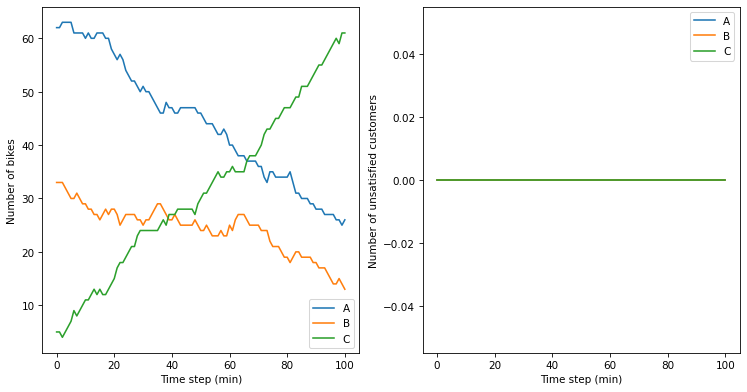

Average Number of Unsatisfied Customers:  0.035

A_start:  63


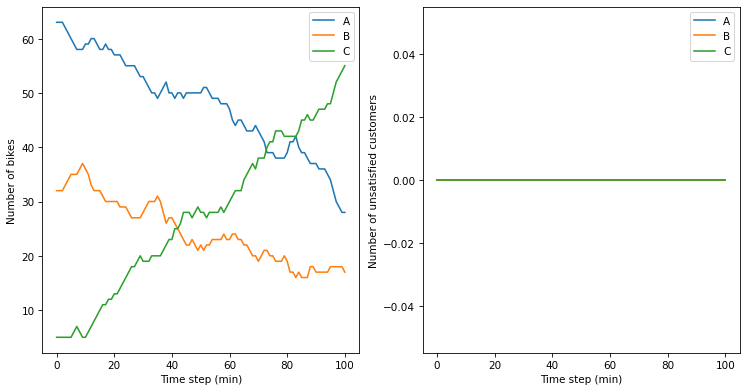

Average Number of Unsatisfied Customers:  0.0

A_start:  64


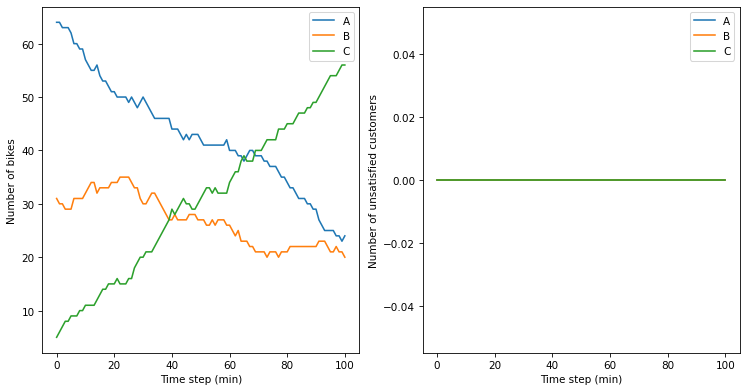

Average Number of Unsatisfied Customers:  0.025


In [29]:
# probabilities for biking from one place to another
p_AB = 0.3
p_BA = 0.2
p_AC = 0.4
p_CA = 0.1
p_BC = 0.35
p_CB = 0.15

# initial number of bikes at each place
A_start_list = [56, 57, 58, 59, 60, 61, 62, 63, 64]
# C_start = 10
# C_start = 6
C_start = 5

for A_start in A_start_list:
    print("A_start: ", A_start)
    # B_start = 90 - A_start
    # B_start = 94 - A_start
    B_start = 95 - A_start
    # number of simulations
    num_sims = 200
    total_unsatisfied_sum = 0
    for i in range(num_sims):
        bikeshare = State(A=A_start, B=B_start, C=C_start,
                          A_empty=0, B_empty=0, C_empty=0)
        do_plot = False
        if i == (num_sims - 1):
            do_plot = True
        total_unsatisfied = run_simulation(bikeshare, p_AB, p_BA, p_AC,
                                           p_CA, p_BC, p_CB, num_steps=100, do_plot=do_plot)
        total_unsatisfied_sum += total_unsatisfied

    avg_total_unsatisfied = total_unsatisfied_sum / num_sims
    print("Average Number of Unsatisfied Customers: ", avg_total_unsatisfied)
    print()

C_start:  9


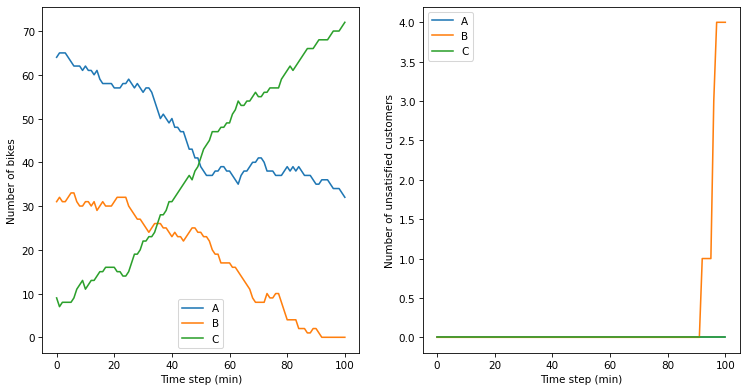

Average Number of Unsatisfied Customers:  0.05

C_start:  8


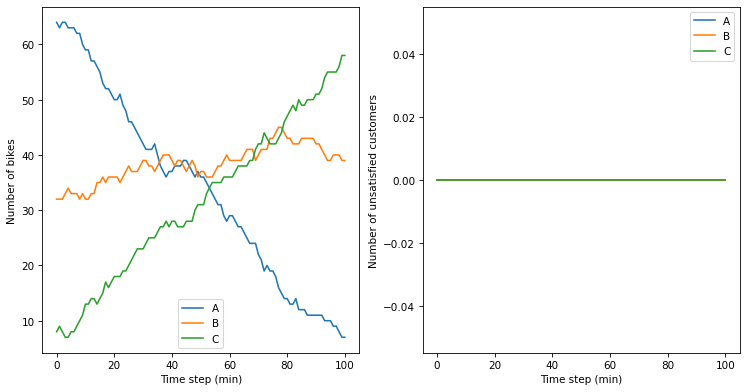

Average Number of Unsatisfied Customers:  0.07

C_start:  7


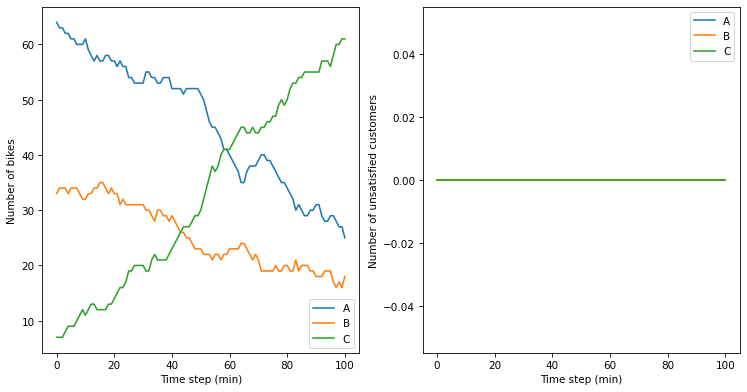

Average Number of Unsatisfied Customers:  0.005

C_start:  6


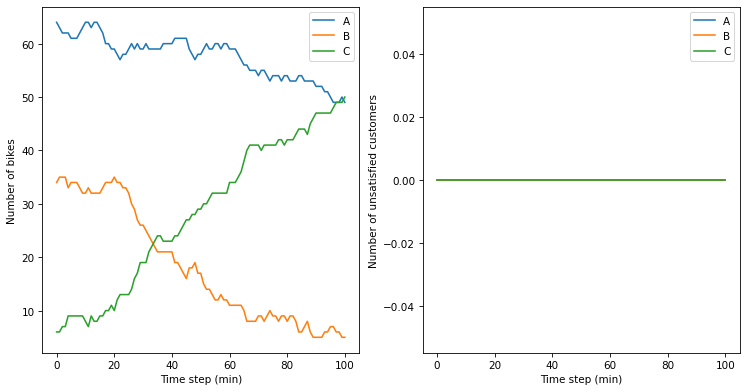

Average Number of Unsatisfied Customers:  0.0

C_start:  5


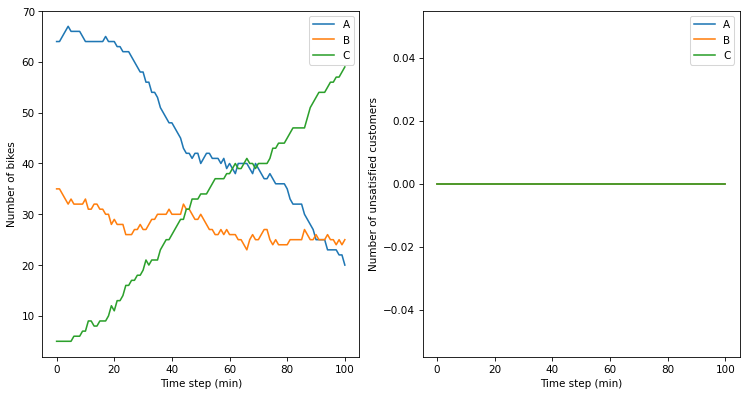

Average Number of Unsatisfied Customers:  0.0

C_start:  4


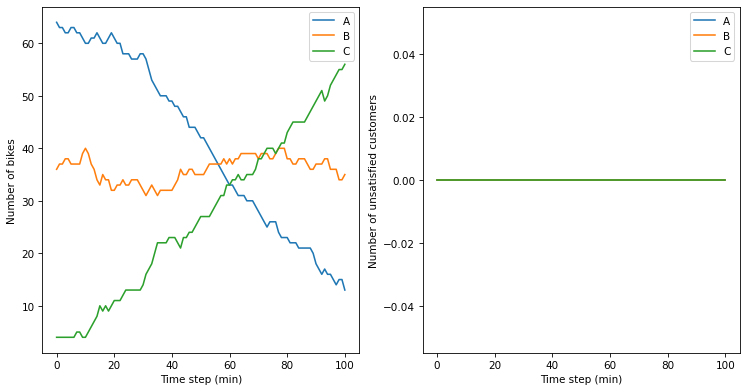

Average Number of Unsatisfied Customers:  0.005

C_start:  3


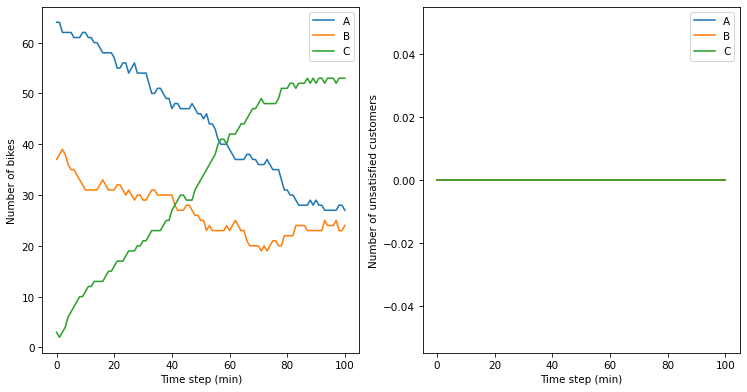

Average Number of Unsatisfied Customers:  0.005

C_start:  2


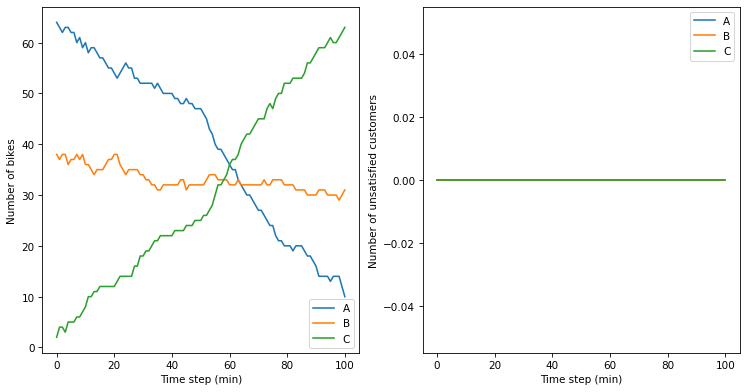

Average Number of Unsatisfied Customers:  0.055


In [26]:
# probabilities for biking from one place to another
p_AB = 0.3
p_BA = 0.2
p_AC = 0.4
p_CA = 0.1
p_BC = 0.35
p_CB = 0.15

# initial number of bikes at each place
A_start_list = 60
# C_start_list = [7, 8, 9, 10, 11, 12, 13]
C_start_list = [9, 8, 7, 6, 5, 4, 3, 2]

for C_start in C_start_list:
    print("C_start: ", C_start)
    B_start = 40 - C_start
    # number of simulations
    num_sims = 200
    total_unsatisfied_sum = 0
    for i in range(num_sims):
        bikeshare = State(A=A_start, B=B_start, C=C_start,
                          A_empty=0, B_empty=0, C_empty=0)
        do_plot = False
        if i == (num_sims - 1):
            do_plot = True
        total_unsatisfied = run_simulation(bikeshare, p_AB, p_BA, p_AC,
                                           p_CA, p_BC, p_CB, num_steps=100, do_plot=do_plot)
        total_unsatisfied_sum += total_unsatisfied

    avg_total_unsatisfied = total_unsatisfied_sum / num_sims
    print("Average Number of Unsatisfied Customers: ", avg_total_unsatisfied)
    print()